In [1]:
#import modules
import numpy as np
import numpy.random as npr
import scipy.stats as sps
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import lm as lm 
import pandas as pd

In [2]:
#Setting up the parameters
N = 1000 #sample size
B = 500 #bootstrap sample size ie number of replication
a = 1  #true interpcept
b = 0.5 #true slope
s = 0.4 #true variance

In [4]:
#simulating the data
e = sps.norm.rvs(size=N,loc=0, scale=s) #simulating residual vector
x = sps.norm.rvs(size=N,loc=2,scale=1) #simulating explanatory variable
y = a+b*x+e #constructing dependent variable
m = np.c_[y,x] #constructing dataset

In [5]:
#Getting the estimates from sample
ols_main = lm.lm('y~c+x', data=m, header=['y','x']) #estimating linear regression based on simulated dataset
ols_main.estimate()

In [6]:
ols_main.summary()

The regression output for the model y~c+x
The number of observation is 1000
The number of estimates is 2
The dependent variable is y
Variables	Coefficients	Std. Errors	t-statistics	p-values
Intercept   	   1.012	 0.02795	    36.2	       0
x           	  0.4899	 0.01246	   39.31	       0
The R^2 is 0.607550239686
The adjusted R^2 is 0.607157003453.
The F test statistics is 1545.00066129 with p value 1.11022302463e-16.


In [7]:
#Setting things up for bootstraping 
coef = np.zeros((B,2)) #initiate vector to store bootstrapped coefficient estiamtes. 

In [8]:
#A bootstrap procedures for the intercept the slope coefficients
#Estimate the intercept and slope coefficients for each bootstrap sample. 
for j in range(0,B):
    index = npr.choice(range(0,N), size=N, replace=True) #construct index set for bootstrap sample. 
    bootsample = m[list(index)] #extract bootstrap sample. 
    ols_temp = lm.lm('y~c+x', data=bootsample, header=['y','x']) #estimate regression based on bootstrap sample
    ols_temp.estimate()
    coef[j] = ols_temp.coef.reshape((1,2)) #store bootstrap estimate

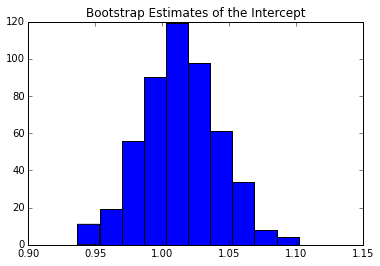

In [12]:
#Plot the bootstrap estimates
plt.hist(coef[:,0])
plt.title('Bootstrap Estimates of the Intercept')

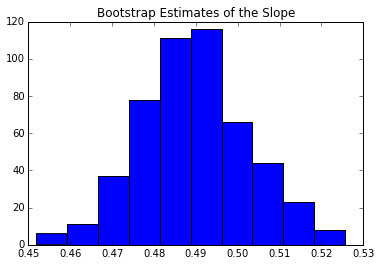

In [13]:
plt.hist(coef[:,1])
plt.title('Bootstrap Estimates of the Slope')

In [14]:
#Calculate the variance-covariance matrix
tempx = np.c_[np.ones(N), x]
cov = np.power(s,2)*np.linalg.inv(np.dot(tempx.transpose(), tempx))
truecov = np.diag(cov) #ture variance of the estimate. 

In [16]:
cov

array([[ 0.00084551, -0.00033945],
       [-0.00033945,  0.00016809]])

In [17]:
truecov

array([ 0.00084551,  0.00016809])

In [18]:
#Put the result together in Pandas for pretty printing.
summary = np.c_[truecov.reshape((2,1)), np.diag(ols_main.cov).reshape((2,1)), np.array([sps.tvar(coef[:,i]) for i in range(0,2)]).reshape((2,1))]
summary = np.r_[np.c_[np.r_[a,b], ols_main.coef.reshape((2,1)), np.array([sps.tmean(coef[:,i]) for i in range(0,2)]).reshape((2,1))], summary]
header = ['Theoretical', 'Sample Estimate', 'Bootstrap Estiamte']
labelx = ['a','b','var a', 'var b']
result = pd.DataFrame(summary, columns=header, index = labelx)
print(result)

       Theoretical  Sample Estimate  Bootstrap Estiamte
a         1.000000         1.011954            1.013245
b         0.500000         0.489860            0.489490
var a     0.000846         0.000781            0.000810
var b     0.000168         0.000155            0.000167
